BT Settl models are now stored at SVO http://svo2.cab.inta-csic.es/theory/newov2/index.php?models=bt-settl-cifist. Let's have a look.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/media/david/5tb_storage1/btsettl_test/models_1612911800/bt-settl-cifist/'

In [4]:
specs = os.listdir(path)
specs

['lte046.0-4.5-0.0a+0.0.BT-Settl.spec.7.dat.txt',
 'lte050.0-5.0-0.0a+0.0.BT-Settl.spec.7.dat.xml']

In [5]:
w1, f1 = np.loadtxt(path+specs[0], unpack=True)

(1e-20, 520415885672.05347)

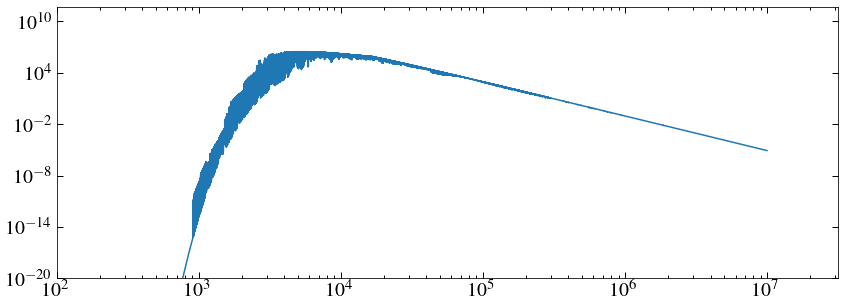

In [6]:
plt.plot(w1,f1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(100)
plt.ylim(1e-20)

In [7]:
max(w1)/10000

999.227

Compare with old?

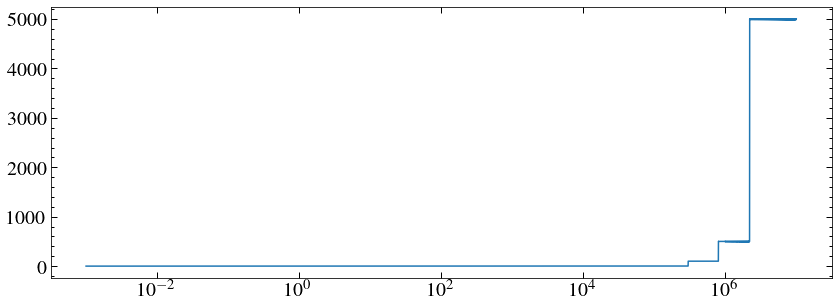

In [8]:
plt.plot(w1[1:], np.diff(w1))
plt.xscale('log')

In [9]:
t1new = Table.read('svo_test/test_output/Trappist-1_test_phoenix_interpolated.ecsv')
t1old = Table.read('../trappist-1/phoenix_repo/lyon_phoenix_2628_5.21_100um.ecsv')

(0.0, 700.0)

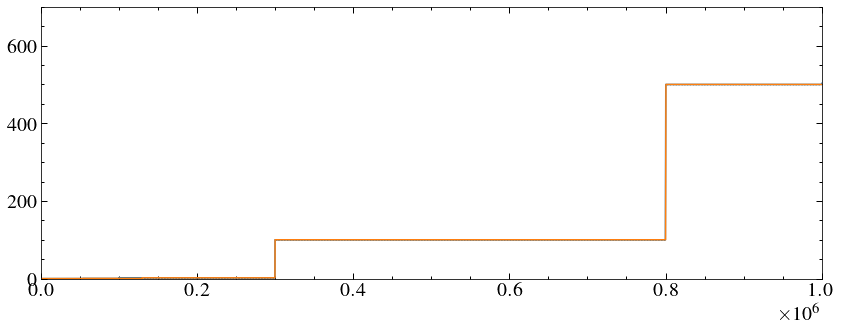

In [10]:
for data in t1new, t1old:
   #plt.plot(data['WAVELENGTH'], data['FLUX'])
   # print(data['WAVELENGTH'][0], data['WAVELENGTH'][-1])
    plt.plot(data['WAVELENGTH'][1:], np.diff(data['WAVELENGTH']))
plt.xlim(0, 1e6)
plt.ylim(0, 700)

In [11]:
wo, fo = t1old['WAVELENGTH'], t1old['FLUX']
wn, fn = t1new['WAVELENGTH'], t1new['FLUX']

In [12]:
mask = (wn >= wo[0]) & (wn <= wo[-1])
wn1, fn1 = wn[mask], fn[mask]

In [13]:
foi =interp1d(wo, fo, fill_value='extrapolate')(wn1)

/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


(341.9472290988368, 20000.0)

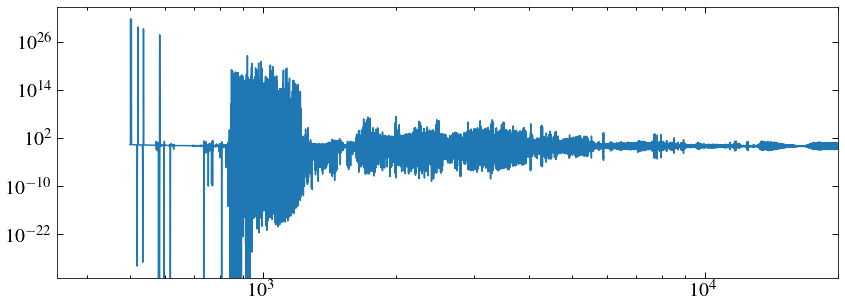

In [14]:
plt.plot(wn1, fn1/foi)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0, 2e4)

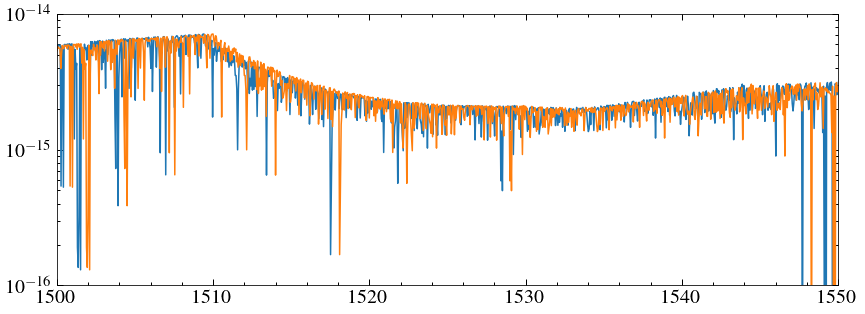

In [120]:
plt.plot(wn, fn)
plt.plot(wo, fo)
plt.xlim(1500, 1550)
plt.ylim(1e-16, 1e-14)
plt.yscale('log')
# plt.axvline(4861.363)
# plt.axvline(4862.721)
# plt.xscale('log')
# 4861.363
# 	4862.721

New ones are at air wavelengths?

In [131]:
def air_to_vac(w_air):
    """
    Converts the air wavelengths to vaccum wavelengths via the formular from https://www.astro.uu.se/valdwiki/Air-to-vacuum%20conversion
    """
    s = 1e4/w_air
    n = 1. + 0.00008336624212083 + (0.02408926869968 / (130.1065924522 - s**2)) + (0.0001599740894897 / (38.92568793293 - s**2))
    w_vac = w_air * n
    return w_vac

# woa = wo / (1.0 + 2.735182E-4 + 131.4182 / wo**2 + 2.76249E8 / wo**4)
wna = air_to_vac(wn1)

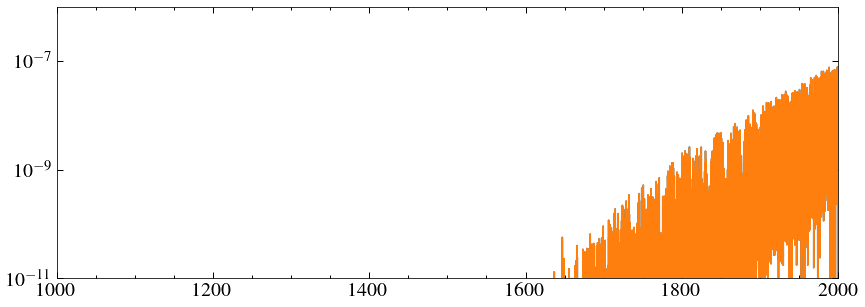

In [132]:
plt.step(wna, fn1, where='mid')
plt.step(wo, fo, where='mid')
plt.xlim(1000, 2000)
plt.ylim(1e-11, 10e-7)
plt.yscale('log')

In [138]:
foi =interp1d(wo, fo, fill_value='extrapolate')(wna)

(0.01, 10.0)

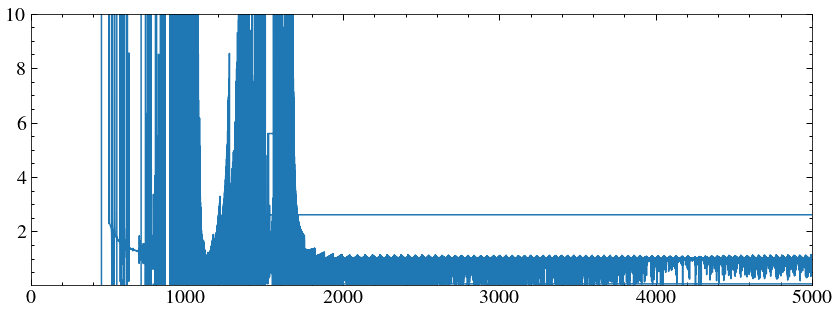

In [141]:
plt.step(wna, fn1/foi, where='mid')
#plt.yscale('log')
# plt.xscale('log')
plt.xlim(0, 5000)
plt.ylim(0.01,10 )

Looks like v small differences in the wavelength offset. Add a function to make_phoenix to do the wavlength correction?

In [51]:
og = Table.read('svo_test/test_output/Trappist-1_test_phoenix_interpolated.ecsv')

In [52]:
wt, ft = og['WAVELENGTH'], og['FLUX']

0

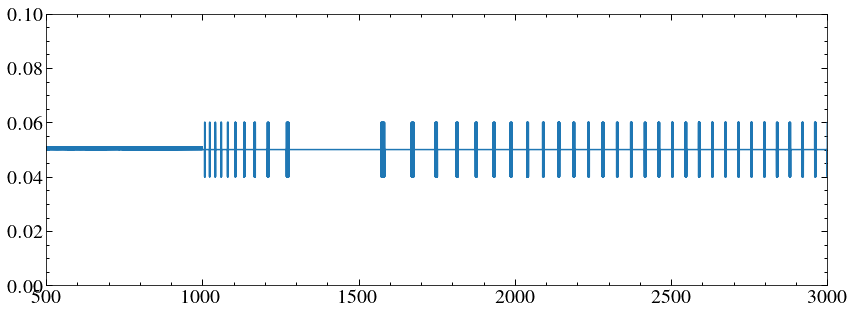

In [59]:
plt.plot(wt[1:], np.diff(wt))
plt.xlim(500, 3000)
plt.ylim(0, 0.1)
len(np.diff(wt)[np.diff(wt < 0)])

In [66]:
wta = air_to_vac(wt)

2

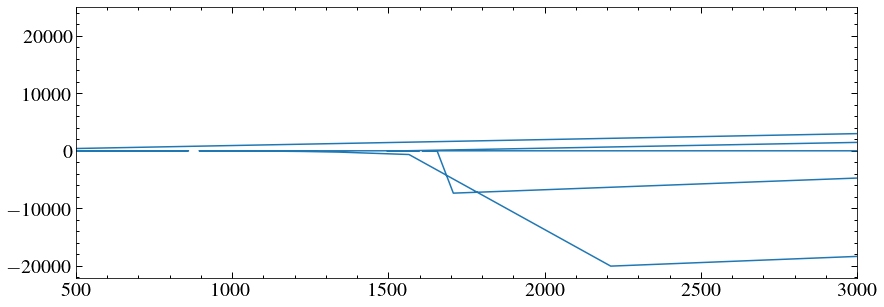

In [67]:
plt.plot(wta[1:], np.diff(wta))
plt.xlim(500, 3000)
# plt.ylim(0, 0.1)
len(np.diff(wta)[np.diff(wta < 0)])

In [70]:
np.where(wt==1600.01)

(array([21941]),)

In [73]:
print(wta[21941:23941])

    WAVELENGTH    
     Angstrom     
------------------
1598.6891399680412
1598.7048498547892
 1598.719289174881
 1598.732385990195
1598.7440628274007
1598.7542361351436
 1598.762815676068
1598.7697038443775
 1598.774794898061
 1598.777974093077
               ...
 1700.133619396683
1700.1835989952463
1700.2335786236235
1700.2835582817693
1700.3335379696375
 1700.383517687184
1700.4334974343633
1700.4834772111312
 1700.533457017442
1700.5834368532514
Length = 2000 rows


In [75]:
print(wt[21941])
print(wta[21941])

1600.01
1598.6891399680412


In [88]:
air_to_vac(1600)

1598.6858514926982

(0.999, 1.001)

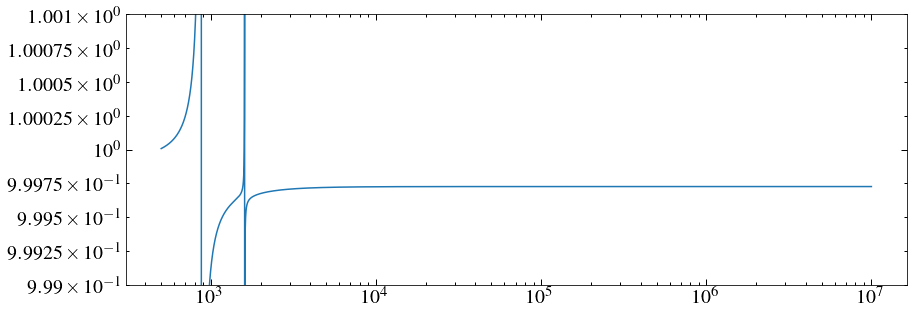

In [85]:
plt.plot(wt, wt/wta)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.999, 1.001)

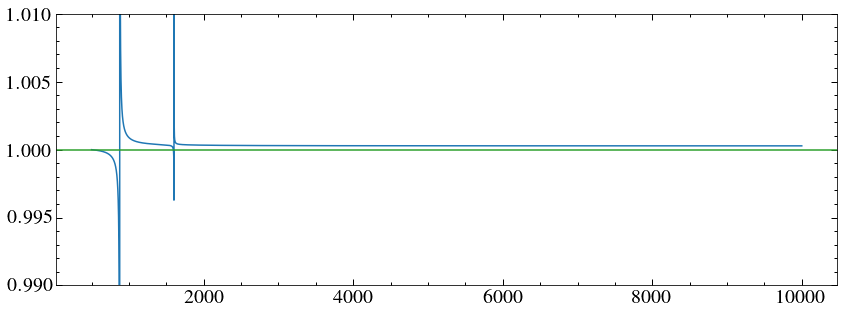

In [93]:
x = np.arange(500, 10000,1)
plt.plot(x, air_to_vac(x)/x)
plt.ylim(0.99, 1.01)
plt.axhline(1, c='C2')

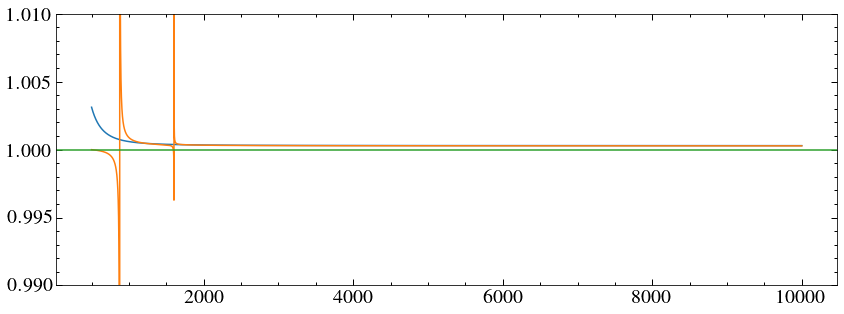

In [95]:
def air_to_vac2(wavelength):
    """
    Implements the air to vacuum wavelength conversion described in eqn 65 of
    Griesen 2006
    """
    wlum = wavelength.to(u.um).value
    return (1+1e-6*(287.6155+1.62887/wlum**2+0.01360/wlum**4)) * wavelength

x = np.arange(500, 10000,1)
plt.plot(x, air_to_vac2(x*u.AA)/x)
plt.plot(x, air_to_vac(x)/x)
plt.ylim(0.99, 1.01)
plt.axhline(1, c='C2')

In [100]:
air_to_vac(4958.911)

4960.294929673446

In [106]:
def air_to_vac3(w_air):
    w_vac = []
    for wi in w_air:
        s = 1e4/wi
        n = 1 + 0.00008336624212083 + 0.02408926869968 / (130.1065924522 - s**2) + 0.0001599740894897 / (38.92568793293 - s**2)
        w_vac.append(wi * n)
    return np.array(w_vac)

    
#     where s = 104 / λair and the conversion is: λvac = λair * n. 

In [122]:
air_to_vac2([6562.8]*u.AA)

<Quantity [6564.71286388] Angstrom>

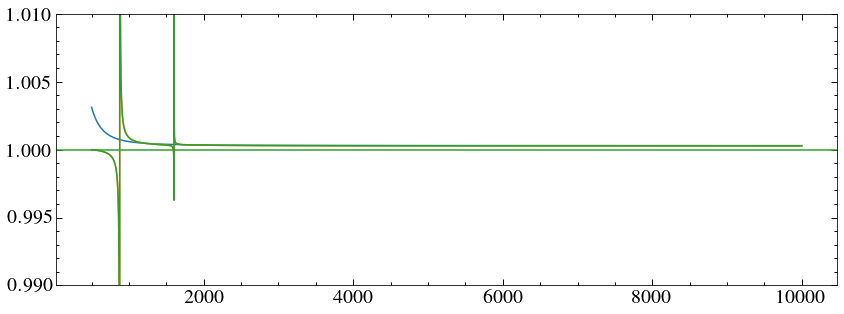

In [110]:
plt.plot(x, air_to_vac2(x*u.AA)/x)
plt.plot(x, air_to_vac(x)/x)
plt.plot(x, air_to_vac3(x)/x)
plt.ylim(0.99, 1.01)
plt.axhline(1, c='C2')

(0.999, 1.001)

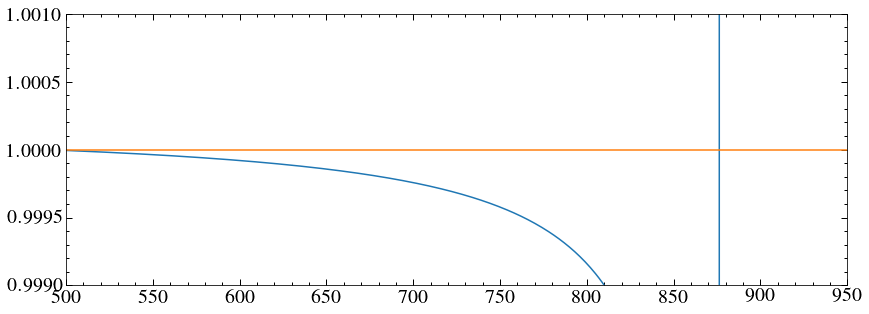

In [172]:
plt.plot(x, air_to_vac(x)/x)
plt.xlim(500, 950)
plt.axhline(1, c='C1')
plt.ylim(0.999, 1.001)

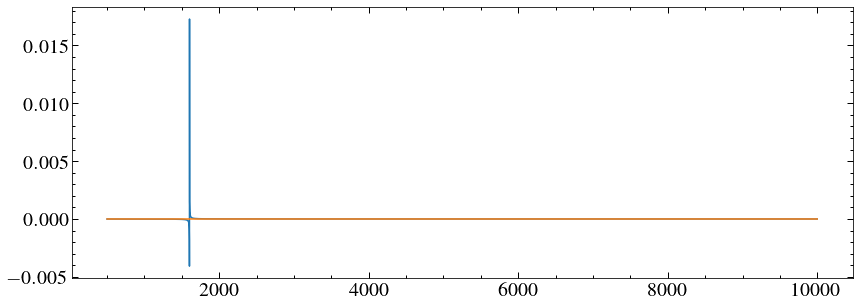

In [156]:
#n = 1 + 0.00008336624212083 + 0.02408926869968 / (130.1065924522 - s**2) + 0.0001599740894897 / (38.92568793293 - s**2)
s = 1e4/x
n1 = 0.02408926869968 / (130.1065924522 - s**2)
n2 = 0.0001599740894897 / (38.92568793293 - s**2)

#plt.plot(x, n1)
plt.plot(x, n2)
#plt.plot(x, (air_to_vac(x)/x)-1)
#plt.xlim(850, 950)

n1 = 0.02408926869968 / (130.1065924522 - s**2)
n2 = 0.0001599740894897 / (38.92568793293 - s**2)
plt.plot(x, n2)

In [150]:
n1.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [157]:
def air_to_vac4(lambda_air):
    s = 1e4 / lambda_air
    n = 1 + 0.00008336624212083 + 0.02408926869968 / (130.1065924522 - s**2) + 0.0001599740894897 / \
        (38.92568793293 - s**2)
    lambda_vac = lambda_air * n
    return lambda_vac

In [168]:
air_to_vac4(1600)

1598.6858514926982

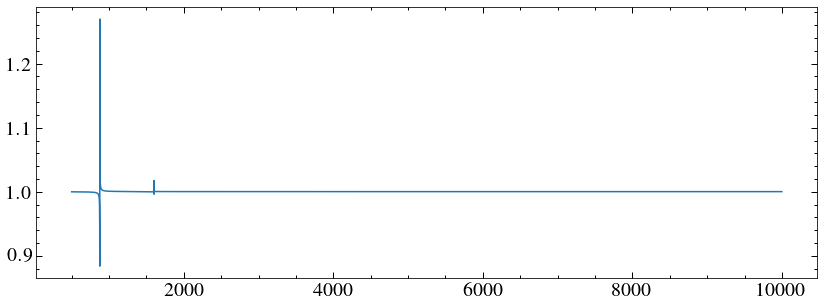

In [165]:
plt.plot(x, air_to_vac4(x)/x)

In [167]:
air_to_vac4(1600)

1598.6858514926982